In [1]:
import pandas as pd

from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
import urllib.request


In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/ajay1808/MLC-Project/main/Merged_Data.csv')
df.head()

,Unnamed: 0,Date,HOUR_BIN,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y,temp,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,Month,Day of Week
0,0,2018-01-01,0,400,11484.0,109663.0,283254.0,299794.0,-11.575,-16.850,...,9.350,304.25,1026.925,0.00,16.000,0.00,NaN,0.00,1,0
1,1,2018-01-01,4,233,4268.0,32370.0,137862.0,146343.0,-11.975,-16.600,...,7.775,292.75,1027.925,0.05,16.000,16.25,0.150,0.00,1,0
2,2,2018-01-01,8,1070,2275.0,42633.0,151154.0,196377.0,-9.025,-13.350,...,8.350,305.50,1028.500,0.25,15.525,330.25,1.175,3.50,1,0
3,3,2018-01-01,12,1830,4275.0,84638.0,328108.0,415589.0,-5.150,-8.175,...,7.075,320.50,1027.150,0.20,16.000,296.75,1.075,3.25,1,0
4,4,2018-01-01,16,1422,5761.0,81748.0,492717.0,594243.0,-6.350,-9.775,...,7.775,305.75,1027.750,0.20,16.000,2.50,0.000,0.00,1,0


In [3]:
df = df.iloc[:,1:]
df.columns

Index(['Date', 'HOUR_BIN', 'Citibike_Y', 'GreenTaxi_Y', 'YellowTaxi_Y',
       'MTAExit_Y', 'MTAEntry_Y', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'snow', 'snowdepth', 'windgust', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'Month', 'Day of Week'],
      dtype='object')

In [4]:
df['Citibike_Y'].unique()

array([  400,   233,  1070, ...,  8079, 12011,  6088], dtype=int64)

In [5]:
df = df.iloc[:,[0,1,24,25,7,8,9,10,11,12,13,14,16,17,18,19,20,2,3,4,5,6]]
df.head()

,Date,HOUR_BIN,Month,Day of Week,temp,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y
0,2018-01-01,0,1,0,-11.575,-16.850,-17.325,62.4725,0.0,0.0,...,9.350,304.25,1026.925,0.00,16.000,400,11484.0,109663.0,283254.0,299794.0
1,2018-01-01,4,1,0,-11.975,-16.600,-16.475,69.2450,0.0,0.0,...,7.775,292.75,1027.925,0.05,16.000,233,4268.0,32370.0,137862.0,146343.0
2,2018-01-01,8,1,0,-9.025,-13.350,-15.475,60.3375,0.0,0.0,...,8.350,305.50,1028.500,0.25,15.525,1070,2275.0,42633.0,151154.0,196377.0
3,2018-01-01,12,1,0,-5.150,-8.175,-16.250,41.5300,0.0,0.0,...,7.075,320.50,1027.150,0.20,16.000,1830,4275.0,84638.0,328108.0,415589.0
4,2018-01-01,16,1,0,-6.350,-9.775,-14.900,50.9925,0.0,0.0,...,7.775,305.75,1027.750,0.20,16.000,1422,5761.0,81748.0,492717.0,594243.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4380 non-null   object 
 1   HOUR_BIN          4380 non-null   int64  
 2   Month             4380 non-null   int64  
 3   Day of Week       4380 non-null   int64  
 4   temp              4380 non-null   float64
 5   feelslike         4380 non-null   float64
 6   dew               4380 non-null   float64
 7   humidity          4380 non-null   float64
 8   precip            4380 non-null   float64
 9   precipprob        4380 non-null   float64
 10  snow              4380 non-null   float64
 11  snowdepth         4380 non-null   float64
 12  windspeed         4380 non-null   float64
 13  winddir           4380 non-null   float64
 14  sealevelpressure  4380 non-null   float64
 15  cloudcover        4380 non-null   float64
 16  visibility        4380 non-null   float64


In [7]:
df_timeViz= df.groupby('Date').agg({ 'Citibike_Y':'sum', 'GreenTaxi_Y':'sum', 'YellowTaxi_Y':'sum',
       'MTAExit_Y':'sum', 'MTAEntry_Y':'sum'}).reset_index()
df_timeViz

,Date,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y
0,2018-01-01,5412,31758.0,403330.0,1759642.0,2090364.0
1,2018-01-02,18772,31173.0,385982.0,3675039.0,5006488.0
2,2018-01-03,24197,35098.0,424973.0,4003416.0,5522248.0
3,2018-01-04,1796,8528.0,197593.0,2455652.0,3077846.0
4,2018-01-05,4948,36701.0,428929.0,3479145.0,4775332.0
...,...,...,...,...,...,...
725,2019-12-27,31548,12455.0,271666.0,3668664.0,4487394.0
726,2019-12-28,28174,13154.0,284024.0,2839872.0,3292620.0
727,2019-12-29,17581,11240.0,268475.0,2365517.0,2690374.0
728,2019-12-30,12052,13071.0,271388.0,3605190.0,4438804.0


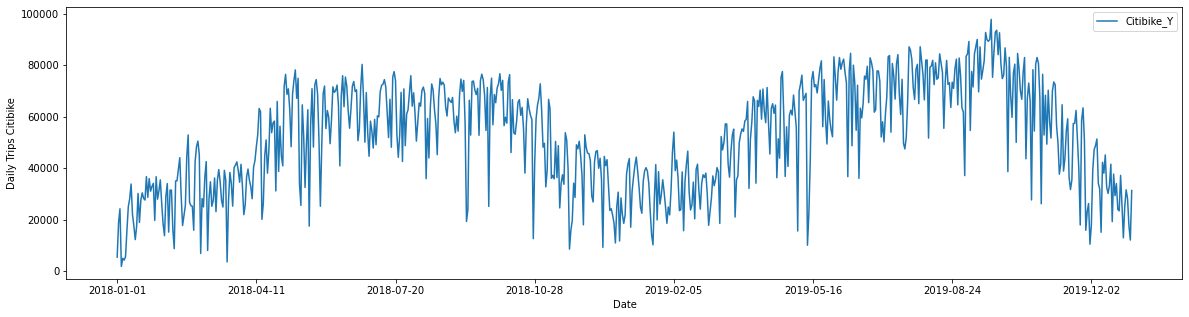

In [8]:
df_timeViz.plot(x = "Date", y = ['Citibike_Y'],figsize=(20,5))
plt.ylabel('Daily Trips Citibike')
plt.show()

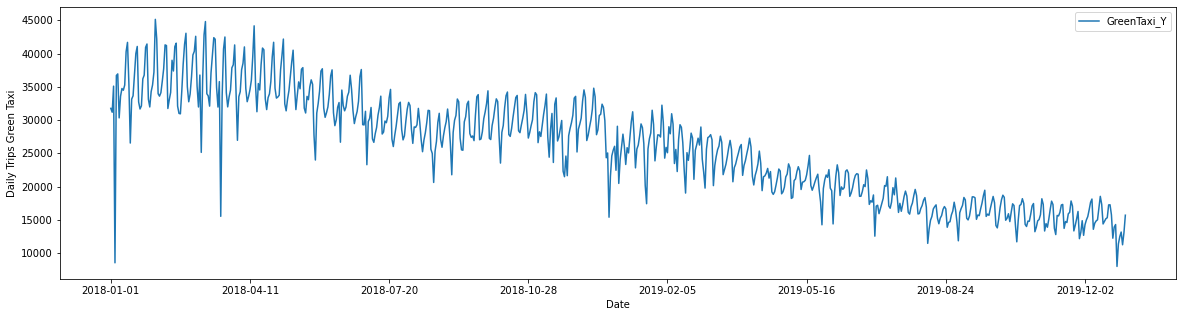

In [9]:
df_timeViz.plot(x = "Date", y = ['GreenTaxi_Y'],figsize=(20,5))
plt.ylabel('Daily Trips Green Taxi')
plt.show()

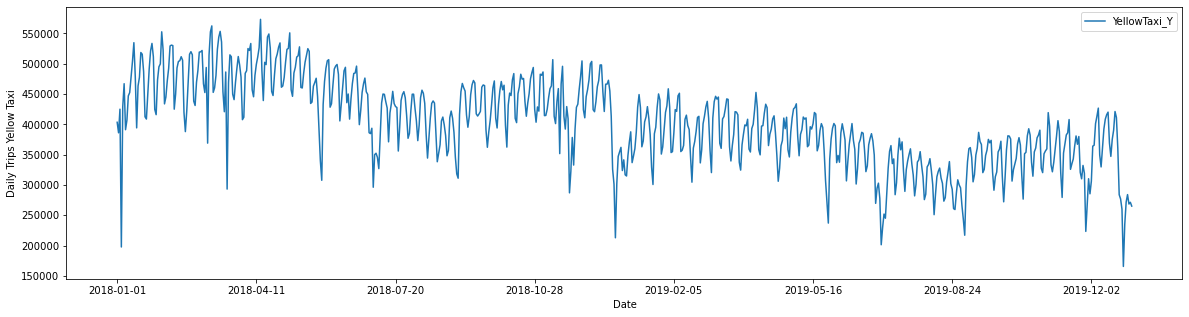

In [10]:
df_timeViz.plot(x = "Date", y = ['YellowTaxi_Y'],figsize=(20,5))
plt.ylabel('Daily Trips Yellow Taxi')
plt.show()

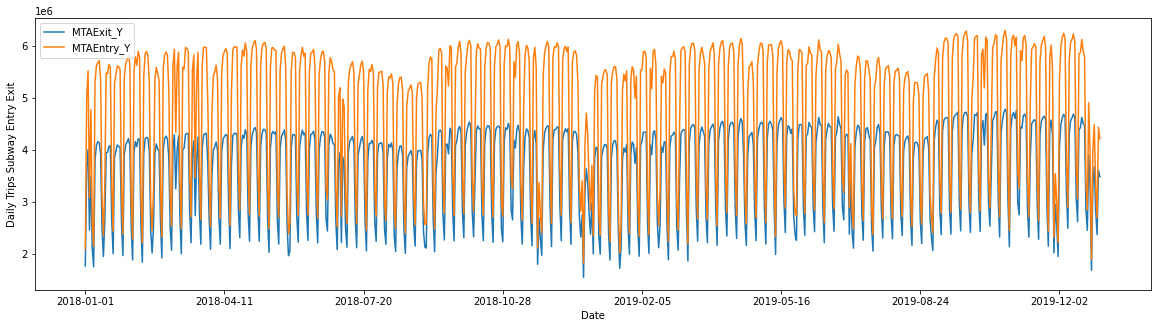

In [11]:
df_timeViz.plot(x = "Date", y = ['MTAExit_Y','MTAEntry_Y'],figsize=(20,5))
plt.ylabel('Daily Trips Subway Entry Exit')
plt.show()

In [12]:
df_t = df.iloc[:,17:].apply(pd.cut, bins=30, labels=False)
df_t.reset_index(inplace = False)
df_t

,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y
0,0,26,24,5,4
1,0,9,5,1,1
2,0,4,8,2,2
3,1,9,18,6,6
4,1,12,17,9,9
...,...,...,...,...,...
4375,2,0,1,1,1
4376,7,4,8,12,11
4377,10,7,12,16,16
4378,5,9,13,20,20


In [13]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Citibike_Y    4380 non-null   int64
 1   GreenTaxi_Y   4380 non-null   int64
 2   YellowTaxi_Y  4380 non-null   int64
 3   MTAExit_Y     4380 non-null   int64
 4   MTAEntry_Y    4380 non-null   int64
dtypes: int64(5)
memory usage: 171.2 KB


In [14]:
X = df_t
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=5,random_state=999)
GM.fit(X)

GaussianMixture(n_components=5, random_state=999)

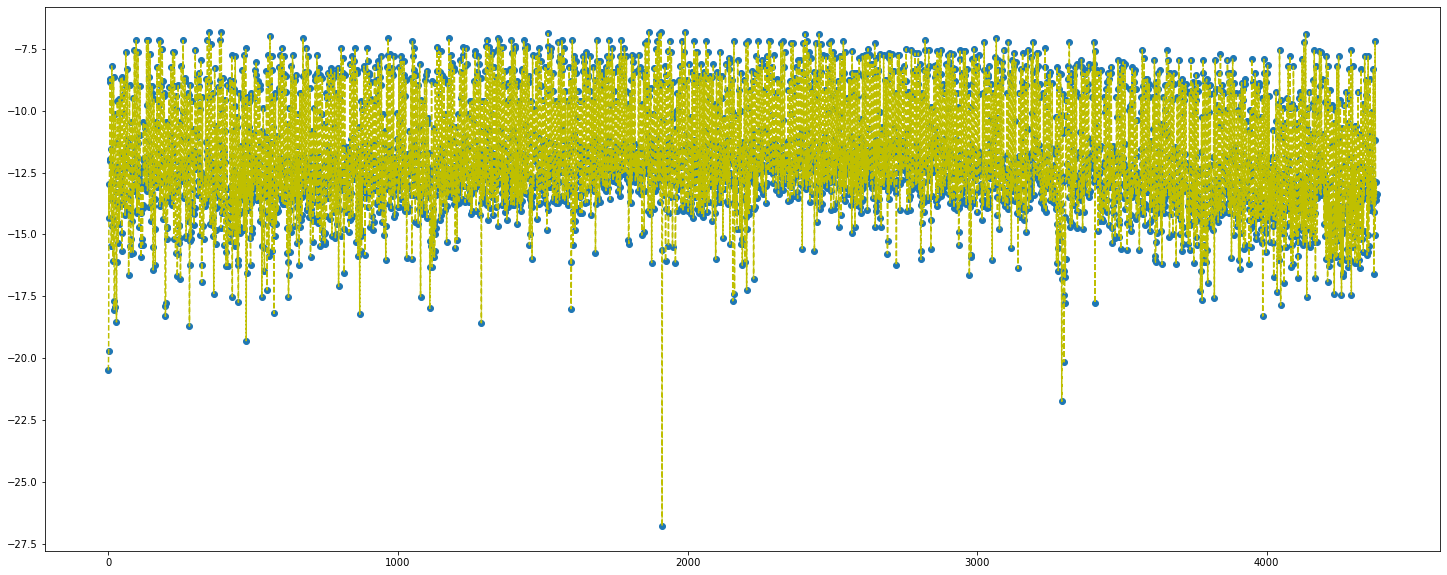

In [15]:
import matplotlib.pylab as plt
plt.figure(figsize=(25,10))
plt.scatter(range(len(X)),GM.score_samples(X))
plt.plot(GM.score_samples(X),"y--")
plt.show()

In [16]:
df['Score'] = GM.score_samples(X)
df.head()

,Date,HOUR_BIN,Month,Day of Week,temp,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y,Score
0,2018-01-01,0,1,0,-11.575,-16.850,-17.325,62.4725,0.0,0.0,...,304.25,1026.925,0.00,16.000,400,11484.0,109663.0,283254.0,299794.0,-20.483153
1,2018-01-01,4,1,0,-11.975,-16.600,-16.475,69.2450,0.0,0.0,...,292.75,1027.925,0.05,16.000,233,4268.0,32370.0,137862.0,146343.0,-19.722038
2,2018-01-01,8,1,0,-9.025,-13.350,-15.475,60.3375,0.0,0.0,...,305.50,1028.500,0.25,15.525,1070,2275.0,42633.0,151154.0,196377.0,-12.946545
3,2018-01-01,12,1,0,-5.150,-8.175,-16.250,41.5300,0.0,0.0,...,320.50,1027.150,0.20,16.000,1830,4275.0,84638.0,328108.0,415589.0,-14.337035
4,2018-01-01,16,1,0,-6.350,-9.775,-14.900,50.9925,0.0,0.0,...,305.75,1027.750,0.20,16.000,1422,5761.0,81748.0,492717.0,594243.0,-12.054062


In [17]:
df.sort_values('Score', ascending = True).head()

,Date,HOUR_BIN,Month,Day of Week,temp,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y,Score
1912,2018-11-15,16,11,3,1.025,-4.775,0.325,94.9425,0.6170,100.0,...,30.25,1022.300,45.325,5.70,1367,3038.0,46022.0,1100862.0,1621713.0,-26.768287
3292,2019-07-03,16,7,2,83.700,87.075,68.450,60.2950,0.0115,75.0,...,225.00,1011.250,13.775,9.90,21102,5149.0,61535.0,1023746.0,1411985.0,-21.735557
0,2018-01-01,0,1,0,-11.575,-16.850,-17.325,62.4725,0.0000,0.0,...,304.25,1026.925,0.000,16.00,400,11484.0,109663.0,283254.0,299794.0,-20.483153
3300,2019-07-05,0,7,4,73.375,73.375,69.825,88.6250,0.0000,0.0,...,65.75,1020.450,24.750,9.75,1293,1711.0,17549.0,514175.0,510908.0,-20.142695
1,2018-01-01,4,1,0,-11.975,-16.600,-16.475,69.2450,0.0000,0.0,...,292.75,1027.925,0.050,16.00,233,4268.0,32370.0,137862.0,146343.0,-19.722038


In [18]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest

In [19]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore
hc = HillClimbSearch(df_t)
hc_model = hc.estimate(scoring_method='bicscore')
print(hc_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('GreenTaxi_Y', 'YellowTaxi_Y'), ('MTAEntry_Y', 'MTAExit_Y')]


In [20]:
bayes_model = BayesianModel(hc_model.edges())
bayes_model.fit(df_t, estimator=MaximumLikelihoodEstimator)

C:\Users\Shantanu\anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [21]:
def LL(x,model,verbose=False):
    loglike = 0
    for cpd in model.get_cpds():
        temp_cpd = cpd.copy()
        thevariable = temp_cpd.variable
        theparents = model.predecessors(thevariable)
        for parent in theparents:
            temp_cpd.reduce([(parent, x[parent])])
        theprob = temp_cpd.get_values()[x[thevariable],0]
        if verbose:
            print (thevariable,theparents,theprob)
        loglike += np.log(theprob)
    return loglike

In [22]:
df_t['loglikelihood']=df_t.apply(lambda x: LL(x, bayes_model, verbose = False),axis=1)

IndexError: index 29 is out of bounds for axis 0 with size 29

In [ ]:
import matplotlib.pylab as plt
plt.figure(figsize=(25,10))
plt.scatter(range(len(df_t['loglikelihood'])),df_t['loglikelihood'])
plt.plot(df_t['loglikelihood'],"y--")
plt.show()

In [ ]:
df = pd.concat([df, df_t['loglikelihood']], axis =1)
df.head()

In [23]:
df_anamoly = df.loc[df['Score']<(-12)]
df_anamoly.describe()

,HOUR_BIN,Month,Day of Week,temp,feelslike,dew,humidity,precip,precipprob,snow,...,winddir,sealevelpressure,cloudcover,visibility,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y,Score
count,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,...,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2.613000e+03,2.613000e+03,2613.000000
mean,12.589361,6.605434,3.136242,33.591558,32.631139,23.580719,63.351934,0.145993,16.178722,0.009954,...,189.948147,1017.562024,23.016409,12.720152,10865.737467,5415.122465,82384.528129,7.465659e+05,1.002485e+06,-13.467801
std,5.491061,3.448050,2.024685,29.515996,30.855495,26.683445,17.779947,2.022223,29.596951,0.086227,...,96.778948,8.090481,22.140812,3.489999,7382.208602,2192.631157,21391.487553,2.966285e+05,4.143775e+05,1.224370
min,0.000000,1.000000,0.000000,-13.150000,-18.500000,-20.025000,15.270000,0.000000,0.000000,0.000000,...,0.666667,988.000000,0.000000,1.175000,0.000000,471.000000,12444.000000,6.277700e+04,6.572200e+04,-26.768287
25%,8.000000,4.000000,1.000000,8.850000,7.275000,1.433333,50.085000,0.000000,0.000000,0.000000,...,101.500000,1012.300000,1.133333,9.900000,4774.000000,3627.000000,69429.000000,5.542390e+05,6.853420e+05,-13.965197
50%,12.000000,7.000000,3.000000,22.400000,22.200000,14.700000,61.305000,0.000000,0.000000,0.000000,...,215.250000,1017.625000,16.533333,14.700000,10065.000000,5282.000000,82848.000000,7.777140e+05,1.109135e+06,-13.172285
75%,16.000000,10.000000,5.000000,64.850000,64.850000,51.350000,76.975000,0.003000,25.000000,0.000000,...,268.000000,1022.725000,44.100000,16.000000,15573.000000,6963.000000,97555.000000,9.733570e+05,1.293857e+06,-12.577945
max,20.000000,12.000000,6.000000,95.750000,108.200000,75.925000,99.840000,56.485500,100.000000,2.667500,...,359.666667,1043.725000,100.000000,16.000000,33112.000000,13098.000000,135165.000000,1.370140e+06,1.765634e+06,-12.003648


In [26]:
df_km = df_t

In [28]:
kmeans = KMeans(n_clusters = 2, random_state= 999)
df_km = df_t
fit_kmeans = kmeans.fit(df_km)
df_km['k_type'] = fit_kmeans.labels_
df_km.head()

,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y,k_type
0,0,26,24,5,4,1
1,0,9,5,1,1,0
2,0,4,8,2,2,0
3,1,9,18,6,6,0
4,1,12,17,9,9,0


In [29]:
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
cluster_r = range(2,15)

for n_clusters in cluster_r:
    model = KMeans(random_state=999, n_clusters= n_clusters)
    preds = model.fit_predict(df_km)
    silhouette_avg = silhouette_score(df_km, preds)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.5203728596095181
For n_clusters = 3, the average silhouette_score is : 0.36338844891910094
For n_clusters = 4, the average silhouette_score is : 0.3334435564274141
For n_clusters = 5, the average silhouette_score is : 0.31405899685390204
For n_clusters = 6, the average silhouette_score is : 0.30853249870203564
For n_clusters = 7, the average silhouette_score is : 0.32448771128955584
For n_clusters = 8, the average silhouette_score is : 0.32438756598230817
For n_clusters = 9, the average silhouette_score is : 0.3270416112497334
For n_clusters = 10, the average silhouette_score is : 0.3342597430427761
For n_clusters = 11, the average silhouette_score is : 0.3209392116964463
For n_clusters = 12, the average silhouette_score is : 0.3242294267985727
For n_clusters = 13, the average silhouette_score is : 0.32768808491215595
For n_clusters = 14, the average silhouette_score is : 0.32673633599633356


In [ ]:
df_km.loc[df_km['k_type']==0].head()

In [ ]:
df_km['k_type'].value_counts()

In [30]:
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
df_Gaussian=df_t
for n_clusters in cluster_r:
    model = GaussianMixture(random_state=999, n_components=n_clusters)
    preds = model.fit_predict(df_Gaussian)
    silhouette_avg = silhouette_score(df_Gaussian, preds)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.5203728596095181
For n_clusters = 3, the average silhouette_score is : 0.30542285544608827
For n_clusters = 4, the average silhouette_score is : 0.22133644753236129
For n_clusters = 5, the average silhouette_score is : 0.20619556695656646
For n_clusters = 6, the average silhouette_score is : 0.23773708469538513
For n_clusters = 7, the average silhouette_score is : 0.22409555002024484
For n_clusters = 8, the average silhouette_score is : 0.17743080023494054
For n_clusters = 9, the average silhouette_score is : 0.05625777755386044
For n_clusters = 10, the average silhouette_score is : 0.15638684860532667
For n_clusters = 11, the average silhouette_score is : 0.17395317686125444
For n_clusters = 12, the average silhouette_score is : 0.17443042088410726
For n_clusters = 13, the average silhouette_score is : 0.18540758551008973
For n_clusters = 14, the average silhouette_score is : 0.15412963533214988


In [ ]:
X= df.loc[:,['HOUR_BIN','temp', 'feelslike', 'dew', 'humidity','precip', 
          'precipprob', 'snow', 'snowdepth', 'windgust', 'windspeed',
          'winddir', 'sealevelpressure', 'cloudcover', 'visibility','solarradiation', 'solarenergy', 'uvindex']]
y = df.loc[:,['YellowTaxi_Y']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
logreg = LogisticRegression()

Y = y_train
X = X_train
logreg.fit(X, Y)

pred = logreg.predict(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

In [ ]:
dt = DecisionTreeClassifier(max_depth=rs.best_params_['max_depth']) 
dt.fit(X_train,y_train)


from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['medium', 'low', 'high', 'awful'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [ ]:

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import cross_val_score

param_grid = {'max_depth':range(1,2)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test),multi_class = 'ovo'))